# Laboratorio 2022-23

## Sesión 12: Álgebra lineal y dinámica de poblaciones


En esta sesión vamos a aplicar álgebra lineal elemental para estudiar modelos sencillos que describen cómo evoluciona un población. De la lectura previa conocemos algunos resultados teóricos. Con estos ejercicios comprobaremos la veracidad de estos resultados.

_Advertencia:_ Algunos métodos para matrices, como $\texttt{eigenvectors}\_\texttt{right}$, no funcionan cuando la matriz está definida en RR o CC, los anillos en los que Sagemath trabaja por defecto cuando encuentra números decimales y complejos, respectivamente. Otros métodos, por ejemplo  $\texttt{eigenvalues}$, sí funcionan, pero pueden tener problemas de precisión. Por ello, si vas a usar alguno de estos métodos conviene que definas la matriz en los anillos  QQ (racionales), RDF (Real Double Field) o CDF (Complex Double Field). 

____________

**Ejercicio 1** 

En una población de una determinada especie, los individuos se dividen en dos clases de edad:

- Clase $X$: individuos jóvenes de menos de 1 año. Estos individuos no tienen descendencia, y al cabo del año sobrevive un 60%.
- Clase $Y$: individuos adultos de más de 1 año. Cada uno de estos individuos tiene, en promedio, 3.5 crías cada año. Y al final del año, solo un 20% consigue sobrevivir una temporada más.

Denotamos por $X_n$, $Y_n$ la población de la clase $X$ y de la clase $Y$, respectivamente, en el año $n$. A la vista de los datos, la población de dos años consecutivos está relacionada por una expresión matricial de la forma

$$ \left(\begin{array}{c} X_{n+1} \\Y_{n+1} \end{array} \right)= \left(\begin{array}{cc} A & B \\ C & D \end{array} \right)\left(\begin{array}{c} X_{n} \\Y_{n} \end{array} \right).$$



a) Escribir la matriz de transición 

$$M=\left(\begin{array}{cc} A & B \\ C & D \end{array} \right)$$

con los valores correctos de $A$, $B$, $C$ y $D$ para este modelo. 
Comprobar que, aunque no se trata de una matriz de Leslie, tiene un autovalor dominante simple positivo. Determina el autovector normalizado correspondiente al autovalor dominante.

**Nota 1.** Recordar que los autovectores asociados a un autovalor $\lambda$ de una matriz cuadrada $A$ de tamaño $n$, son las soluciones al sistema lineal homogéneo $A-\lambda\cdot I_n=\vec{0}$ (con $I_n$ la matriz identidad de tamaño $n$). Con SageMath podemos obtener el espacio de autovectores asociados a $\lambda$ para una matriz $A$, con 
$$(A-\lambda\texttt{*identity}\_\texttt{matrix}(n))\texttt{.right}\_\texttt{kernel}()$$
y calculamos una **base** (una lista de vectores independientes) del mismo con
$$(A-\lambda\texttt{*identity}\_\texttt{matrix}(n))\texttt{.right}\_\texttt{kernel}()\texttt{.basis}()$$
(como lista, accedemos a cualquiera de sus elementos con la notación *slice*, $[\texttt{j}]$ con $\texttt{j}$ el índice del elemento que nos interese).

**Nota 2.** Si $A$ es una matriz, $A\texttt{.eigenvectors}\_\texttt{right}()$ devuelve una lista de pares $$(\texttt{autovalor, lista de autovectores independientes asociados al autovalor}).$$
En este ejercicio, en el que solo nos interesa uno de los autovalores, trabajar a partir de ella suele resultar más engorroso.

**Nota 3.** En este ejercicio, si el vector inicial de población (que está en el primer cuadrante) es no nulo, necesariamente tiene una componente no nula en la dirección del vector propio asociado al autovalor dominante.

In [1]:
# Matriz de transición y autovalores
M = matrix(QQ,[[0,3.5],[0.6,0.2]])
autovalores = M.eigenvalues()
print(f"Autovalores: {autovalores}")
      
# Comprobamos que hay un autovalor dominante
autovalor_dominante = autovalores[1]
print(f"Autovalor dominante: {autovalor_dominante}")

# Sacamos el autovector asociado
autovectores = M.eigenvectors_right()
autovector = autovectores[1]
autovector = autovector[1]
autovector = autovector[0]
print(f"Autovector: {autovector}")

# Calculamos la base de autovectores asociados al autovalor
# base = (M - autovalor_dominante*identity_matrix(2))
# show(f"Base: \n",base)

Autovalores: [-1.352583904633395?, 1.552583904633395?]
Autovalor dominante: 1.552583904633395?
Autovector: (1, 0.4435954013238272?)


In [3]:
# Otra forma más precisa:
def autovalor_dominante(M):
    autovalores=M.eigenvalues()
    AbsAutov=[abs(autovalor) for autovalor in autovalores]
    dominante=max(AbsAutov) #Valor absoluto del candidato a dominante, lo es si es simple y único en AbsAutov
    Dominante=autovalores[AbsAutov.index(dominante)] #Candidato, con su signo, a dominante
    simple=bool(dim((M-Dominante*identity_matrix(QQ,M.nrows())).right_kernel())==1)
    unico=bool(AbsAutov.count(dominante)==1)
    real_positivo=bool(Dominante in RR and Dominante>0)
    if  simple and unico and real_positivo:
        print('Existe autovalor dominante, real y positivo, y es: %s'%Dominante)
        return Dominante
    else:
        print('Esta matriz no tiene valor propio dominante, real y positivo.')

M = matrix(QQ,[[0,3.5],[0.6,0.2]])
Dominante = autovalor_dominante(M)

Existe autovalor dominante, real y positivo, y es: 1.552583904633395?


In [4]:
v1=(M-Dominante*identity_matrix(QQ,M.nrows())).right_kernel().basis()[0] #[0] puesto que el método .basis() devuelve una lista
v1=v1/sum(v1)#v1 es un vector, se puede multiplicar por un escalar
print('El vector propio normalizado asociado al valor propio dominante es:')
print(v1)

El vector propio normalizado asociado al valor propio dominante es:
(0.6927148694730984?, 0.3072851305269016?)


b) Se parte de un distribución inicial de la población dada por $X_0=10$ e $Y_0=15$. Calcula los valores de $ X_n$ e $Y_n$ para $n= 0, 1, \dots, 50$, y represéntalos gráficamente frente al *tiempo* $n$ en un diagrama de puntos, con un color distinto para cada una de las dos clases de edad.

**Nota:** Para representar en forma de diagrama de puntos, conviene construir listas de pares $(n,X_n)$ y $(n,Y_n)$.

Poblaciones:


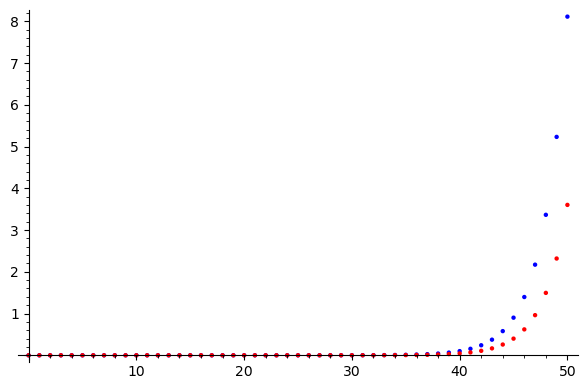

In [28]:
# Valores iniciales
lista_x = [(0,10)]
lista_y = [(0,15)]

# Calculamos el resto
for i in range(1,51):
    # Cogemos los valores que utilizaremos y calculamos el nuevo
    x = lista_y[i-1]; x = 3.5*x[1]
    y1 = lista_x[i-1]; y1 = 0.6*y1[1]
    y2 = lista_y[i-1]; y2 = 0.2*y2[1]
    
    # Creamos la dupla de puntos y la añadimos a la lista
    tupla_x = (i,x)
    tupla_y = (i,y1+y2)
    lista_x.append(tupla_x)
    lista_y.append(tupla_y)
    
print("Poblaciones:")
show((points(lista_x) + points(lista_y, color="red")))

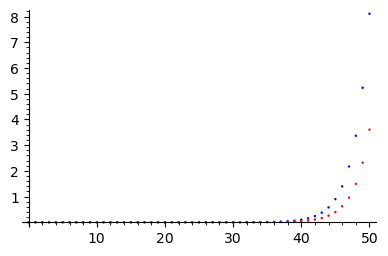

In [7]:
#Para representar en forma de diagrama de puntos, almacenamos pares (n,X_n), (n,Y_n)
Pob=vector((10,15))#Este valor lo modificamos en cada paso
nXn=[(0,Pob[0])]#Lista iniciada con el par (0,X_0)
nYn=[(0,Pob[1])]#Lista iniciada con el par (0,Y_0)
pasos=50#Número de años a visualizar
for j in [1..pasos]:#Vamos a rellenar cada una de las listas de puntos con "pasos" puntos más
    Pob=M*Pob#Calculamos el nuevo vector (X_j,Y_j) 
    nXn.append((j,Pob[0]))#Añadimos (j,X_j) a nXn
    nYn.append((j,Pob[1]))#Añadimos (j,Y_j) a nYn
points(nXn,figsize=4,pointsize=3)+points(nYn,color='red',pointsize=3)#Dibujamos juntas ambas gráficas (se distinguen por el color)

c) De la lectura previa se sigue que asintóticamente (para $n$ grande} se tienen las leyes de crecimiento 

$$
\frac{X_{n+1}}{X_n}\approx \lambda_1,\qquad \frac{Y_{n+1}}{Y_n}\approx\lambda_1,
$$

donde $\lambda_1$ es el autovalor dominante de $M$. 

Sean $ CX_n=\frac{X_{n+1}}{X_{n}} $ y $CY_n=\frac{Y_{n+1}}{Y_{n}}$. Representa graficamente los pares de puntos $(n,CX_n)$ (en azul) y $(n,CY_n)$ (en azul) para $ n=0,\dots, 49$, junto con una recta horizontal a altura $\lambda_1$. De acuerdo con la teoría, deberías observar que tanto los puntos azules como los rojos se aproximan a la recta.

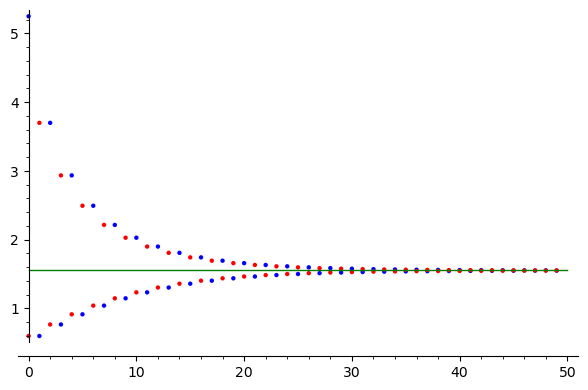

In [29]:
lista_CXn = []
lista_CYn = []
for i in range(0,50):
    tupla_x1 = lista_x[i+1]; tupla_x2 = lista_x[i]
    tupla_x = (i, tupla_x1[1]/tupla_x2[1])
    lista_CXn.append(tupla_x)
    
    tupla_y1 = lista_y[i+1]; tupla_y2 = lista_y[i]
    tupla_y = (i, tupla_y1[1]/tupla_y2[1])
    lista_CYn.append(tupla_y)

show((points(lista_CXn) + points(lista_CYn, color="red") + line([(0,autovalor_dominante),(50,autovalor_dominante)], color="green")))

[(1, 21/4), (2, 3/5), (3, 37/10)] [(1, 3/5), (2, 37/10), (3, 142/185)]

Error al autovalor dominante con 50 años: 0.001890.


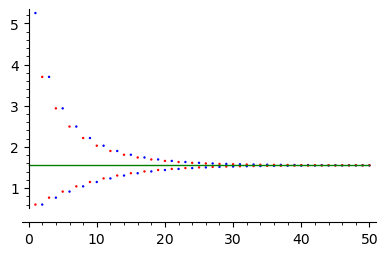

In [10]:
Xn=[xj for j,xj in nXn]#Lista con solo los valores de los Xj [X0, X1, X2, ..., X50]
Yn=[yj for j,yj in nYn]#Lista con solo los valores de los Yj [Y0, Y1, Y2, ..., Y50]

nCXn=[]#Iniciamos (vacía) una lista donde almacenaremos los pares (j,Xj/X{j-1})
nCYn=[]#Iniciamos (vacía) una lista donde almacenaremos los pares (j,Yj/Y{j-1})
for j in [1..len(Xn)-1]:#Recorremos los índices...
    nCXn.append((j,Xn[j]/Xn[j-1]))#... y añadimos el nuevo par a nCXn,
    nCYn.append((j,Yn[j]/Yn[j-1]))# y el nuevo par a nCYn.
show(nCXn[:3],nCYn[:3])#Mostramos unos cuantos de entre los primeros de ambas

grafica=points(nCXn,figsize=4,pointsize=3)+points(nCYn,color='red',pointsize=3)#Nombramos un gráfico con los puntos de ambas listas...
lambda1=nCXn[-1][1]#... tomamos la última (en apariencia) coincidente altura límite de ambas...
print('Error al autovalor dominante con %d años: %f.'%(pasos,abs(lambda1-Dominante)))#proximidad de esta altura al autovalor dominante
grafica+=line([(0,lambda1),(j,lambda1)],color='green')#... y añadimos una línea horizontal a esa altura al gráfico.
show(grafica)#Mostramos el gráfico.

d) Las leyes de crecimiento asintóticas indican que para tiempos $n$ grandes 

$$
X_n\approx \alpha \lambda_1^n,\qquad Y_n\approx \beta\lambda_1^n,
$$

donde $\alpha$ y $\beta$ son constantes no negativas que dependen del dato inicial. Compruébalo representando los puntos con escala logarítmica en el eje vertical (se consigue añadiendo la opción $\texttt{scale='semilogy'}$ al comando con el que generes el dibujo, como $\texttt{points}$ o $\texttt{plot}$). Los puntos se dispondrán asintóticamente sobre rectas de pendiente $\log\lambda_1$. Comprueba esta última afirmación. 

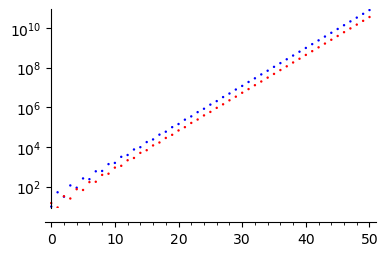

In [30]:
# Escala logarítmica en el eje OY
show((points(lista_x, scale="semilogy",figsize=4,pointsize=3) + points(lista_y, color="red", scale="semilogy",pointsize=3)))

In [11]:
# Comprobamos que las "pendientes asintóticas" coinciden con el logaritmo del autovalor dominante
pend_x=(log(Xn[-1])-log(Xn[-2])).n()#Miramos último [-1] y penúltimo [-2]
pend_y=(log(Yn[-1])-log(Yn[-2])).n()
pend_teor=(log(Dominante).n())
pend_x,pend_y,pend_teor, pend_x-pend_teor,pend_y-pend_teor

(0.438702626618348,
 0.440981719530171,
 0.439920578217555,
 -0.00121795159920718,
 0.00106114131261653)

In [19]:
# De la lectura previa a la sesión se entrevé una manera de calcular los valores teóricos de 
# alpha y beta. Concretamente (alpha,beta)=c_1\omega_1 siendo c_1\omega_1+c_2\omega_2 la expresión del dato inicial en una base de autovectores 
# {omega_1,omega_2} con \omega_1 el correspondiente al autovalor dominante. Vamos a obtener estos valores teóricos trabajando en la base 
# de autovectores.

In [32]:
Autovectores=M.eigenvectors_right()
print(Autovectores)#La información está muy empaquetada.
omegas=[]#Rellenamos una lista de pares (autovalor,autovector)
for av,ws,d in M.eigenvectors_right():
    for w in ws:
        omegas.append((av,w))
show(omegas)
#Interesa ordenarlas. Vamos a hacerlo en orden descendente
#de valores absolutos de autovalores 
#(así el primero es candidato a dominante)
Omegas=[(abs(av),av,w) for av,w in omegas]
Omegas.sort(reverse=True)
omegas=[(av,w) for Av,av,w in Omegas]
show(omegas)

[(-1.352583904633395?, [(1, -0.3864525441809700?)], 1), (1.552583904633395?, [(1, 0.4435954013238272?)], 1)]


[(-1.352583904633395?, (1, -0.3864525441809700?)),
 (1.552583904633395?, (1, 0.4435954013238272?))]

[(1.552583904633395?, (1, 0.4435954013238272?)),
 (-1.352583904633395?, (1, -0.3864525441809700?))]

In [33]:
# Obtener alfa y beta es ahora trivial
omega_1,omega_2=omegas[0][1],omegas[1][1]#Autovectores (en orden)
PobIn=vector((10,15))
Matriz_paso=matrix(2,[omega_1,omega_2]).transpose()
c_1=(Matriz_paso^(-1)*PobIn)[0]
alfa,beta=c_1*omega_1
alfa,beta

(22.72703106365399?, 10.08160646558068?)

In [34]:
# Comprobemos que la ordenada en el origen de las rectas que se obtienen asintóticamente al representar X_n e Y_n en
# escalas logarítmicas coinciden con log(alpha) y log(beta)
ord_x=(log(Xn[-1])-pasos*pend_x).n()#Recordar qué guarda pasos
ord_y=(log(Yn[-1])-pasos*pend_y).n()
ord_x_t=log(alfa).n()#_t de teórica
ord_y_t=log(beta).n()
show(html('Ordenada en el origen para $\\log(X_n)$:'))
print('%f (experimental), %f (teórica), %f (error).'%(ord_x,ord_x_t,abs(ord_x-ord_x_t)))
show(html('Ordenada en el origen para $\\log(Y_n)$:'))
print('%f (experimental), %f (teórica), %f (error).'%(ord_y,ord_y_t,abs(ord_y-ord_y_t)))

Ordenada en el origen para <script type="math/tex">\log(X_n)</script>:

3.183885 (experimental), 3.123555 (teórica), 0.060330 (error).


Ordenada en el origen para <script type="math/tex">\log(Y_n)</script>:

2.258149 (experimental), 2.310713 (teórica), 0.052563 (error).


Nuestro siguiente objetivo es comprobar que, según hemos visto en el documento previo, el ritmo de crecimiento asintótico (de ambas clases) no depende del dato inicial. Puesto que el problema es lineal, basta con que comprobemos este hecho para datos iniciales en la intersección de la circunferencia unidad con el primer cuadrante (en el caso de poblaciones solo tienen sentido los datos no negativos):

$$
(X_0,Y_0)=(\cos\theta,\operatorname{sen}\theta),\quad \theta\in(0,\pi/2).
$$

e) Calcula el cociente $ CX_{50}(\theta)=\frac{X_{50}(\theta)}{X_{49}(\theta)}$ para $\theta=j\frac\pi{200}$ con $j=1,\dots,99$, siendo $X_n(\theta)$ e $Y_n(\theta)$ las poblaciones en tiempo $n$ en las clases $X$ e $Y$ cuando los datos iniciales son $(X_0,Y_0)=(\cos\theta,\operatorname{sen}\theta)$. Representa la función $CX_{50}(\theta)$ así obtenida. Haz lo mismo para el cociente $CY_{50}(\theta)=\frac{Y_{50}(\theta)}{Y_{49}(\theta)}$.
    
**Nota.** En este apartado se van a utilizar ángulos con coseno o seno próximos a cero. Puesto que se pide dividir por una coordenada que puede ser próxima a cero, conviene trabajar con doble precisión cada vez que se tome un valor inicial de la forma $(\cos\theta,\operatorname{sen}\theta)$. Con $\texttt{vector}(\texttt{RDF},(a,b))$, SageMath toma $a$ y $b$ con doble precisión.

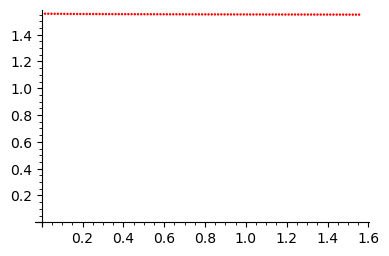

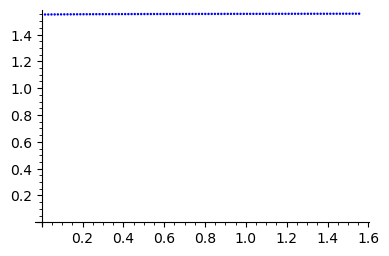

In [35]:
pasos = 50
CX,CY=[],[]#Inicializamos (vacías), con asignación simultánea, dos listas
for j in [1..99]: #xsrange(1,100):
    PobIn=vector(RDF,(cos(j*pi/200),sin(j*pi/200)))##Añadimos RDF pues conviene evitar una posible coordenada =0
    Pobpenult=M^(pasos-1)*PobIn # Como no me interesan las poblaciones intermedias, calculo solo la población..
    Pobult=M*Pobpenult#...en los dos últimos años
    cocX=Pobult[0]/Pobpenult[0]
    cocY=Pobult[1]/Pobpenult[1]
    CX.append((j*pi/200, cocX))
    CY.append((j*pi/200, cocY))       
show(points(CX,color='red',xmin=0,xmax=pi/2,ymin=0,figsize=4,pointsize=3))
show(points(CY,color='blue',xmin=0,xmax=pi/2,ymin=0,figsize=4,pointsize=3))

f) Consideramos los cocientes $ TX_n=\frac{X_{n}}{X_n+Y_n }$, $TY_n=\frac{Y_{n}}{X_n+Y_n}$, que nos indican la **proporción** de individuos en cada clase de edad en tiempo $n$. De acuerdo con lo que hemos aprendido en el documento previo, los vectores $(TX_n,TY_n)$ deberían aproximarse asintóticamente al autovector normalizado correspondiente al autovalor dominante $(a,b)$.

Partiendo de una población inicial $X_0=10$, $Y_0=15$, representa graficamente los pares de puntos $(n,TX_n)$ (en azul) y $(n,TY_n)$ (en azul) para $ n=0,\dots, 49$, junto con rectas horizontales a alturas $a$ y $b$. De acuerdo con la teoría, deberías observar que los puntos azules se acercan a la recta a altura $a$ y los rojos a la recta a altura $b$.

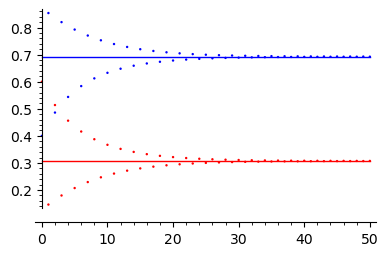

In [36]:
nTX=[(j,Xn[j]/(Xn[j]+Yn[j])) for j in xsrange(len(Xn))]#Recordar qué se guarda en Xn e Yn
nTY=[(j,Yn[j]/(Xn[j]+Yn[j])) for j in xsrange(len(Yn))]
dibujo=points(nTX,color='blue',pointsize=3)+points(nTY,color='red',pointsize=3)
dibujo+=line([(0,v1[0]),(pasos,v1[0])],color='blue')+line([(0,v1[1]),(pasos,v1[1])],color='red')
dibujo.show(figsize=4)

In [37]:
#Comparamos el último vector (TX,TY) con el autovector *normalizado* del autovalor dominante
tx,ty=nTX[-1][1].n(),nTY[-1][1].n()
vector((tx,ty))-v1#Recordar que v1 está "normalizado" (coordenadas positivas de suma 1)

(-0.000225921758032821, 0.000225921758032710)

g) Ilustremos ahora la convergencia de la distribución de la población en clases de la que se habla en el apartado anterior de una forma dinámica.  Programa una animación (consultar la función $\texttt{animate}$) en la que se vea cómo, partiendo una vez más de una población inicial $X_0=10$, $Y_0=15$, va cambiando con $n$ el vector cuyas componentes son la proporción de individuos en cada clase de edad en el tiempo $n$, es decir el vector

$$ 
\left(\frac{X(n)}{X(n)+Y(n)}, \frac{Y(n)}{X(n)+Y(n)}\right).
$$


Animation with 50 frames
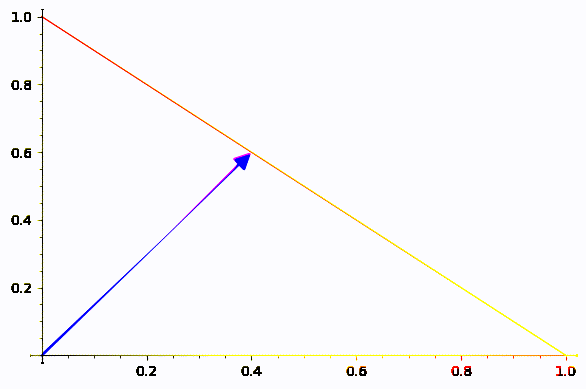

In [38]:
M=matrix(QQ,2,[0,3.5,0.6,0.2])
Pob=vector((10,15))
pasos=50
#Peli va a ser una lista de fotogramas. La iniciamos con la primera imagen (completa)
Peli=[plot(vector(RDF,(Pob[0]/(Pob[0]+Pob[1]),Pob[1]/(Pob[0]+Pob[1]))))+line([(0,1),(1,0)],color='red')]
for _ in xsrange(pasos-1):#Vamos a añadir pasos-1 fotogramas más.
    Pob=M*Pob
    w=vector(RDF,(Pob[0]/(Pob[0]+Pob[1]),Pob[1]/(Pob[0]+Pob[1])))
    Fotograma=plot(w)+line([(0,1),(1,0)],color='red')#Un nuevo fotograma en cada paso
    Peli.append(Fotograma)

animate(Peli)

In [ ]:
#Para guardar la animación como '.gif'
a=animate(Peli)
a.save('peli.gif')

Nuestro siguiente objetivo es comprobar que la proporción límite de individuos en cada clase de edad no depende del dato inicial.  

h) Calcula las proporciones $ TX_{50}(\theta)=\frac{X_{50}(\theta)}{X_{50}(\theta)+Y_{50}(\theta)}$ y $TY_{50}(\theta)=\frac{Y_{50}(\theta)}{X_{50}(\theta)+Y_{50}(\theta)}$ para $\theta=j\frac\pi{200}$ con $j=1,\dots,99$, donde $X_n(\theta)$ e $Y_n(\theta)$ tienen el mismo significado que en el apartado d).  Representa las funciones $TX_{50}(\theta)$ y $TY_{50}(\theta)$ así obtenidas en una misma gráfica, usando para cada una un color.

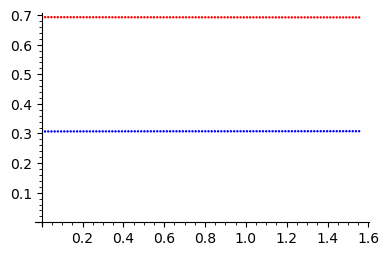

In [39]:
ProporcionesX=[]
ProporcionesY=[]
pasos=50
for j in [1..99]: 
    PobIn=vector(RDF,(cos(j*pi/200),sin(j*pi/200)))
    Pob=M^pasos*PobIn#Solo queremos la situación final (n=pasos) de cada uno de los inicios
    TXt,TYt=Pob[0]/(Pob[0]+Pob[1]),Pob[1]/(Pob[0]+Pob[1])
    ProporcionesX+=[(j*pi/200,TXt)]#Lista de pares (angulo(j),TX_k(angulo(j))) con k=pasos
    ProporcionesY+=[(j*pi/200,TYt)]#Lista de pares (angulo(j),TY_k(angulo(j))) con k=pasos
DibujoX=points(ProporcionesX,color='red',xmin=0,xmax=pi/2,ymin=0,figsize=4,pointsize=3)
DibujoY=points(ProporcionesY,color='blue',xmin=0,xmax=pi/2,ymin=0,pointsize=3)
show(DibujoX+DibujoY)

____________


**Ejercicio 2** 

En una granja de cría de cerdos, los animales son clasificados según sus edades de la siguiente forma:

- Cochinillos: De $0$ a $1$ año.

- Lechones: De 1 a 2 años.

- Jóvenes: De 2 a 3 años.

- Adultos: De 3 a 4 años.

El procedimiento de gestión de las hembras de la granja es el siguiente:

- Se sacrifica al $60\%$ de las que van naciendo para su consumo como cochinillos.

- Se sacrifica para su consumo a todas las hembras cuando llegan a los $4$ años. No se sacrifica a ninguna de las demás, y se supone que ningún animal muere por otras causas.

- Se dedica a todas las hembras jóvenes y adultas a la cría. Se sabe que, en media, cada hembra joven tendrá $0.5$ camadas de $5$ cochinillos, cada hembra adulta tendrá $0.8$ camadas de $5$ cochinillos, y que el $50\%$ de todos los nuevos nacidos serán hembras.

a) Formula el modelo apropiado para describir la evolución de la población de las hembras.

In [40]:
M = matrix(QQ,4,[[0, 0, 0.5*0.5*5, 0.5*0.8*5],[0.4,0,0,0],[0,1,0,0],[0,0,1,0]])
PobI=vector((100,0,0,0))
print([M^k*PobI for k in range(5)]) # Primeras cinco distribuciones con población inicial de 100 cochinillos

[(100, 0, 0, 0), (0, 40, 0, 0), (0, 0, 40, 0), (50, 0, 0, 40), (80, 20, 0, 0)]


In [41]:
PobIn=vector((10,10,10,10))
print([M^k*PobIn for k in range(5)])

[(10, 10, 10, 10), (65/2, 4, 10, 10), (65/2, 13, 4, 10), (25, 13, 13, 4), (97/4, 10, 13, 13)]


b) Comprueba que el autovalor dominante es mayor que 1, y que por tanto la población crece sin límite, por lo que la granja no es sostenible con la tasa de sacrificio dada.    

In [42]:
def autovalor_dominante(M):
    autovalores=M.eigenvalues()
    AbsAutov=[abs(autovalor) for autovalor in autovalores]
    dominante=max(AbsAutov) #Valor absoluto del candidato a dominante, lo es si es simple y único en AbsAutov
    Dominante=autovalores[AbsAutov.index(dominante)] #Candidato, con su signo, a dominante
    simple=bool(dim((M-Dominante*identity_matrix(QQ,M.nrows())).right_kernel())==1)
    unico=bool(AbsAutov.count(dominante)==1)
    real_positivo=bool(Dominante in RR and Dominante>0)
    if  simple and unico and real_positivo:
        print('Existe autovalor dominante, real y positivo, y es: %s'%Dominante)
        return Dominante
    else:
        print('Esta matriz no tiene valor propio dominante, real y positivo.')

autovalor = autovalor_dominante(M)
if autovalor>1:
    print("Autovalor mayor que 1 y, por tanto, la población crece sin límite")
elif autovalor<1:
    print("Autovalor menor que 1 y, por tanto, la población tiende a extinguirse")
else:
    print("Autovalor = 1. Población sostenible")

Existe autovalor dominante, real y positivo, y es: 1.075454093552008?
Autovalor mayor que 1 y, por tanto, la población crece sin límite


c) Se aumenta la tasa de sacrificio al 80%. Comprobar que el autovalor dominante pasa a ser menor que 1, y que por tanto la población tiende a 0 asintóticamente, de forma que la granja tampoco es sostenible. 

In [43]:
def autovalor_dominante(M):
    autovalores=M.eigenvalues()
    AbsAutov=[abs(autovalor) for autovalor in autovalores]
    dominante=max(AbsAutov) #Valor absoluto del candidato a dominante, lo es si es simple y único en AbsAutov
    Dominante=autovalores[AbsAutov.index(dominante)] #Candidato, con su signo, a dominante
    simple=bool(dim((M-Dominante*identity_matrix(QQ,M.nrows())).right_kernel())==1)
    unico=bool(AbsAutov.count(dominante)==1)
    real_positivo=bool(Dominante in RR and Dominante>0)
    if  simple and unico and real_positivo:
        print('Existe autovalor dominante, real y positivo, y es: %s'%Dominante)
        return Dominante
    else:
        print('Esta matriz no tiene valor propio dominante, real y positivo.')

M = matrix(QQ,4,[[0, 0, 0.5*0.5*5, 0.5*0.8*5],[0.2,0,0,0],[0,1,0,0],[0,0,1,0]])
show(M)
# PobI=vector((100,0,0,0))
# print([M^k*PobI for k in range(5)]) 

autovalor = autovalor_dominante(M)
if autovalor>1:
    print("Autovalor mayor que 1 y, por tanto, la población crece sin límite")
elif autovalor<1:
    print("Autovalor menor que 1 y, por tanto, la población tiende a extinguirse")
else:
    print("Autovalor = 1. Población sostenible")

[  0   0 5/4   2]
[1/5   0   0   0]
[  0   1   0   0]
[  0   0   1   0]

Existe autovalor dominante, real y positivo, y es: 0.8880777493502824?
Autovalor menor que 1 y, por tanto, la población tiende a extinguirse


d) Determina una tasa de sacrificio que haga que la granja sea sostenible, esto es, que haga que el  autovalor dominante sea igual a 1. 

**Indicación.** Pon la tasa de sacrificio  $\texttt{t}$  como un parámetro en el lugar adecuado de la matriz (debes decirle a SageMath que $\texttt{t}$ es una variable, para que lo entienda). La matriz, digamos $M_t$, dependerá de un parámetro, y los cálculos en SageMath, al no indicarle ningún anillo, se harán por defecto en el anillo simbólico $\texttt{SR}$. Calcula el polinomio característico 
$$P(x,t)=\texttt{det}(M_t-x*\texttt{identity}\_\texttt{matrix}(4))
\quad\text{ o también}\quad
P(x,t)=\texttt{charpoly}(M_t)
$$
y calcula el $\texttt{t}$ que asegura que $1$ es un autovalor: es decir $P(1,t)==0$. Asegúrate de que $1$ no solo es autovalor, sino que además es el autovalor dominante. 

(El procedimiento $\texttt{.substitute()}$ puede ser útil para, una vez calculado el valor adecuado de $t$, sustituirlo en la matriz $M_t$.)

In [44]:
var('t')
Mt = matrix(4,[[0, 0, 0.5*0.5*5, 0.5*0.8*5],[1-t,0,0,0],[0,1,0,0],[0,0,1,0]])
P1(x,t) = det(Mt - x*identity_matrix(4))
P2(x,t) = charpoly(Mt)
t0 = solve(P1(1,t) == 0,t)[0].rhs()
print(t0)

M = matrix(QQ,Mt.substitute(t==t0))
show(M)

def autovalor_dominante(M):
    autovalores=M.eigenvalues()
    AbsAutov=[abs(autovalor) for autovalor in autovalores]
    dominante=max(AbsAutov) #Valor absoluto del candidato a dominante, lo es si es simple y único en AbsAutov
    Dominante=autovalores[AbsAutov.index(dominante)] #Candidato, con su signo, a dominante
    simple=bool(dim((M-Dominante*identity_matrix(QQ,M.nrows())).right_kernel())==1)
    unico=bool(AbsAutov.count(dominante)==1)
    real_positivo=bool(Dominante in RR and Dominante>0)
    if  simple and unico and real_positivo:
        print('Existe autovalor dominante, real y positivo, y es: %s'%Dominante)
    else:
        print('Esta matriz no tiene valor propio dominante, real y positivo.')

autovalor_dominante(M)

9/13


[   0    0  5/4    2]
[4/13    0    0    0]
[   0    1    0    0]
[   0    0    1    0]

Existe autovalor dominante, real y positivo, y es: 1


e) Comprueba que con la tasa de sacrificio obtenida en d) la explotación es sostenible, calculando qué datos se obtienen hasta $n=500$.

Comprueba que la población total  se estabiliza a una cantidad no nula y la proporción de individuos por clase se estabiliza según las componentes del autovector normalizado asociado al autovalor dominante. 